In [1]:
#### 1.Loading_data_for_signature_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)


     blue     brown turquoise    yellow 
      103        47       135         1 

In [4]:
#### 4.Immune_status_analysis_ImmuneCell_Response.R
### 1) Loading data
### Paper:COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics
##The_Immune_Landscape_of_Cancer
COAD_Immune_Characteristics <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/The_Immune_Landscape_of_Cancer/COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics.rds")
### 2)Merge table
#Cluster.df
#COAD_Immune_Characteristics$TCGA.Participant.Barcode
COAD_Immune_Characteristics$barcode <- gsub("-",".",COAD_Immune_Characteristics$TCGA.Participant.Barcode)
#Cluster.df$rownames
Cluster.df$barcode <- substr(Cluster.df$rownames, start = 1, stop = 12)
MergeTable.Immune.Char <- dplyr::left_join(Cluster.df, COAD_Immune_Characteristics, by = "barcode")
#MergeTable.Immune.Char$IFN.gamma.Response

Loading required package: ggplot2


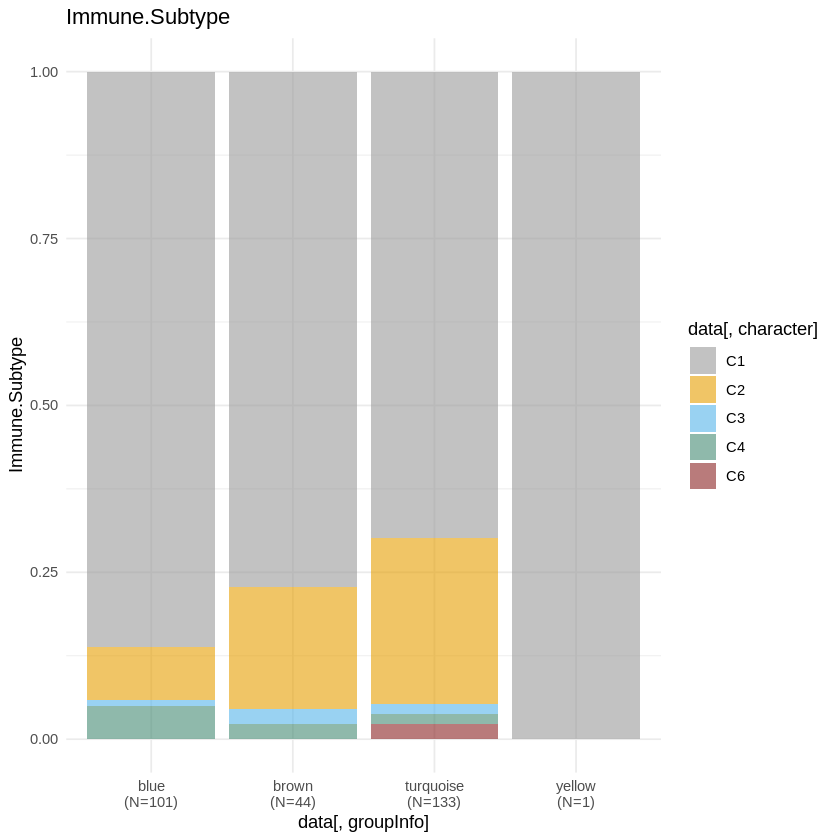

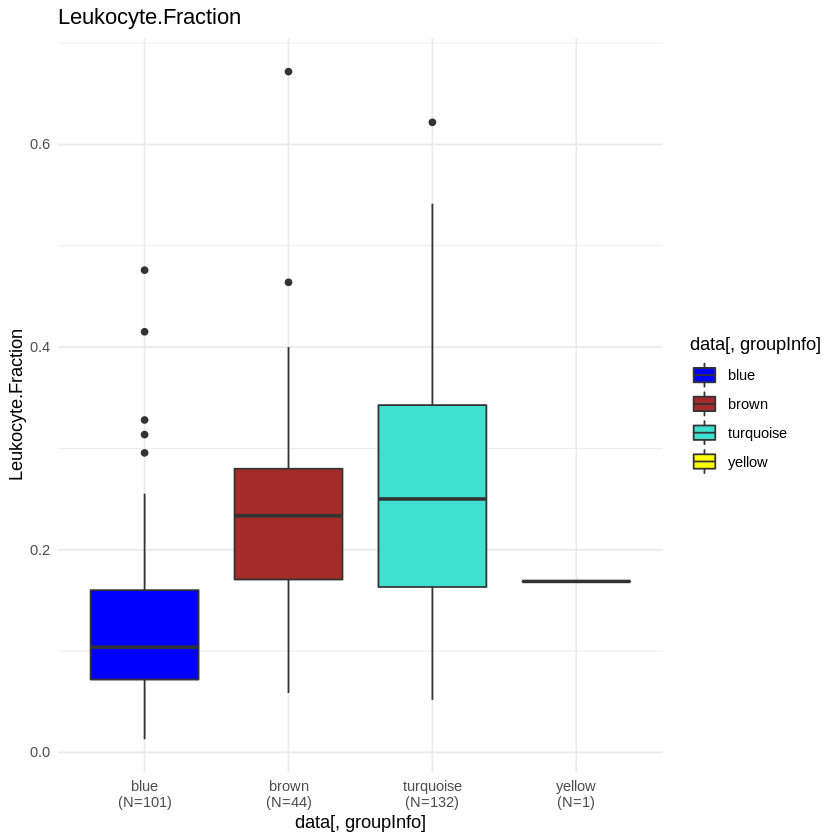

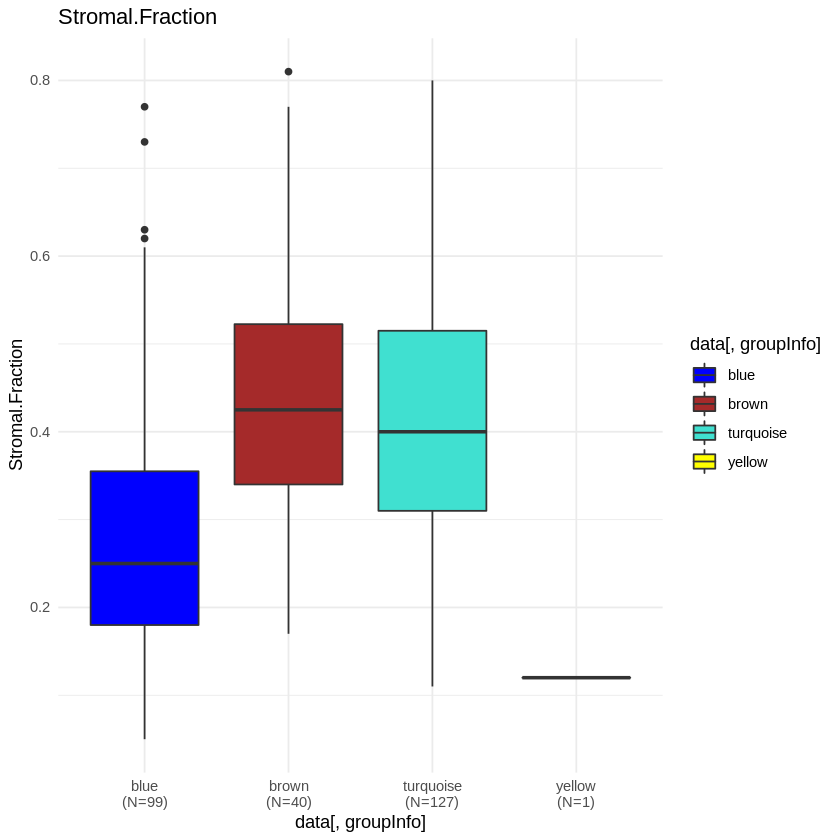

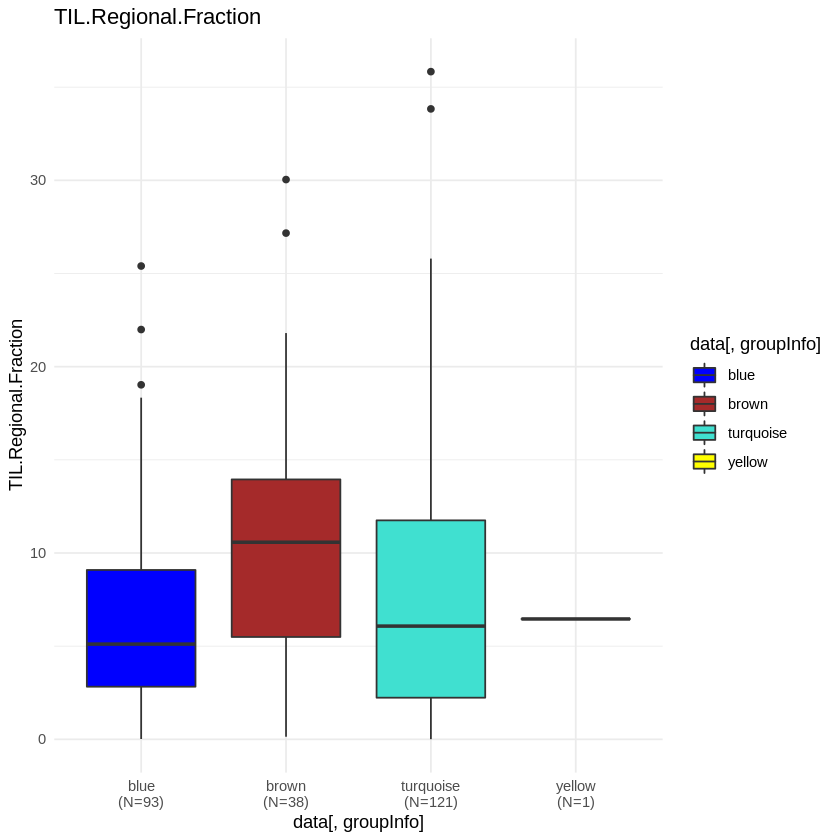

In [5]:
### 3)Construct ggplot dataframe
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/ggplot2_JH.R")
## Immune.Subtype ##
library(ggplot2)
ggplot2_barPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Immune.Subtype",
                   values= alpha(c("#999999", "#E69F00", "#56B4E9","#458B74","#8B2323"),0.6)
                   )
## Leukocyte.Fraction ##
library(ggplot2)
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Leukocyte.Fraction",
                   values=c("blue","brown","turquoise","yellow")
                   )

## Stromal.Fraction ##
library(ggplot2)
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Stromal.Fraction",
                   values=c("blue","brown","turquoise","yellow")
)

## TIL.Regional.Fraction ## 
library(ggplot2)
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "TIL.Regional.Fraction",
                   values=c("blue","brown","turquoise","yellow")
)

#### The Immune Landscape of Cancer 5 Representative Gene Signature Identification

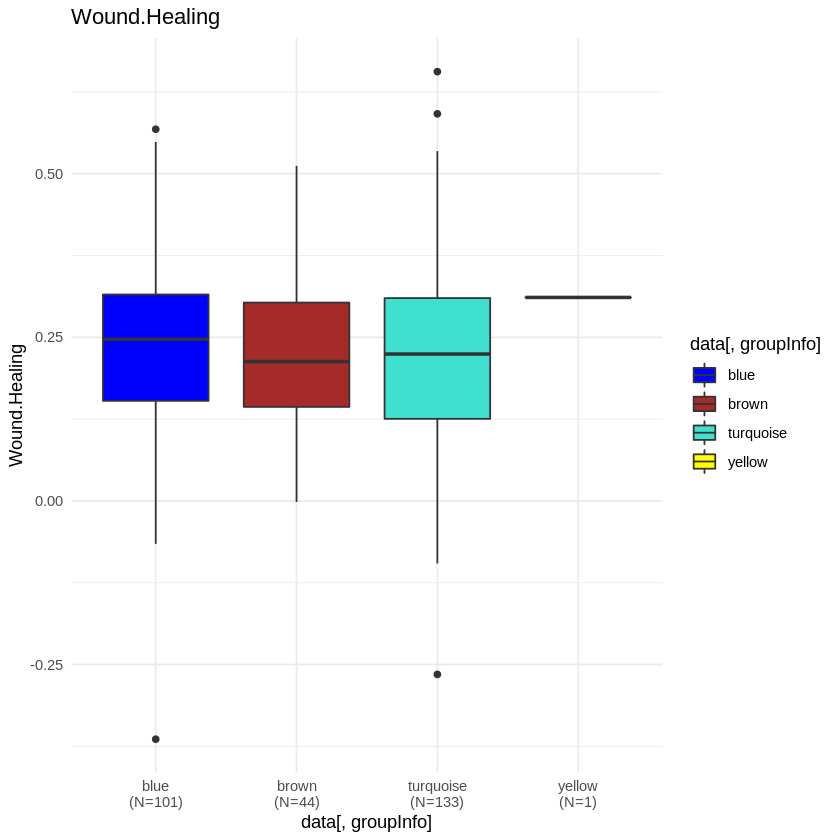

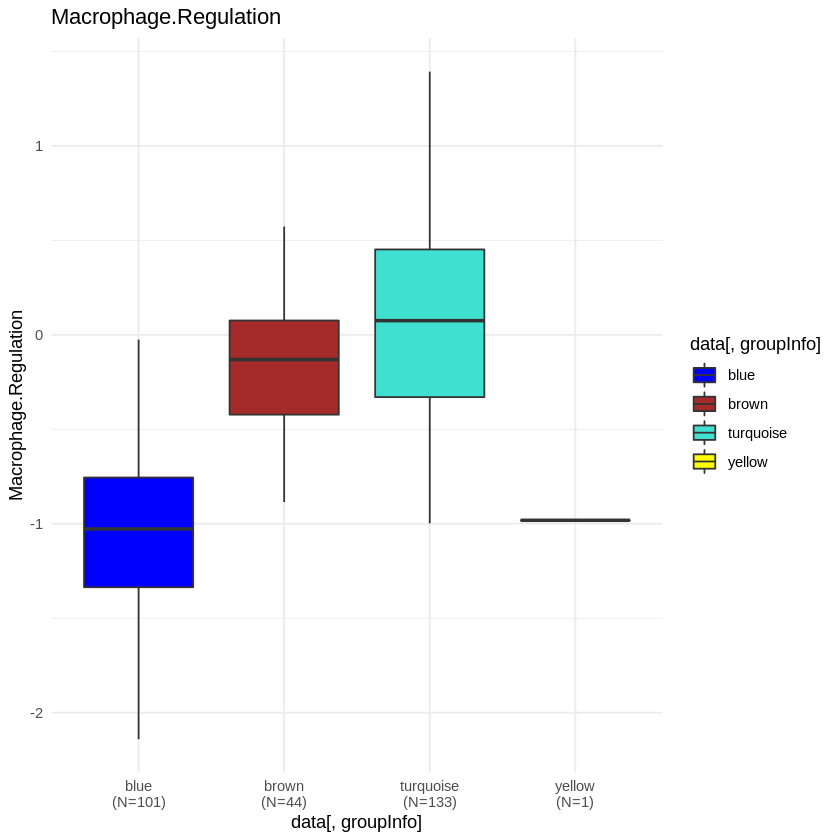

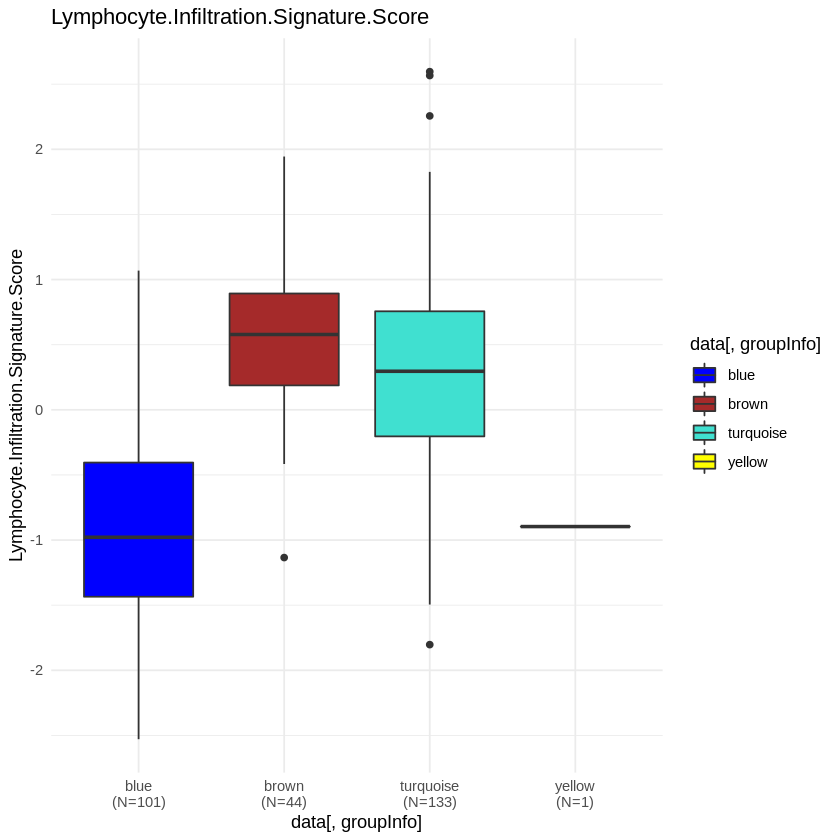

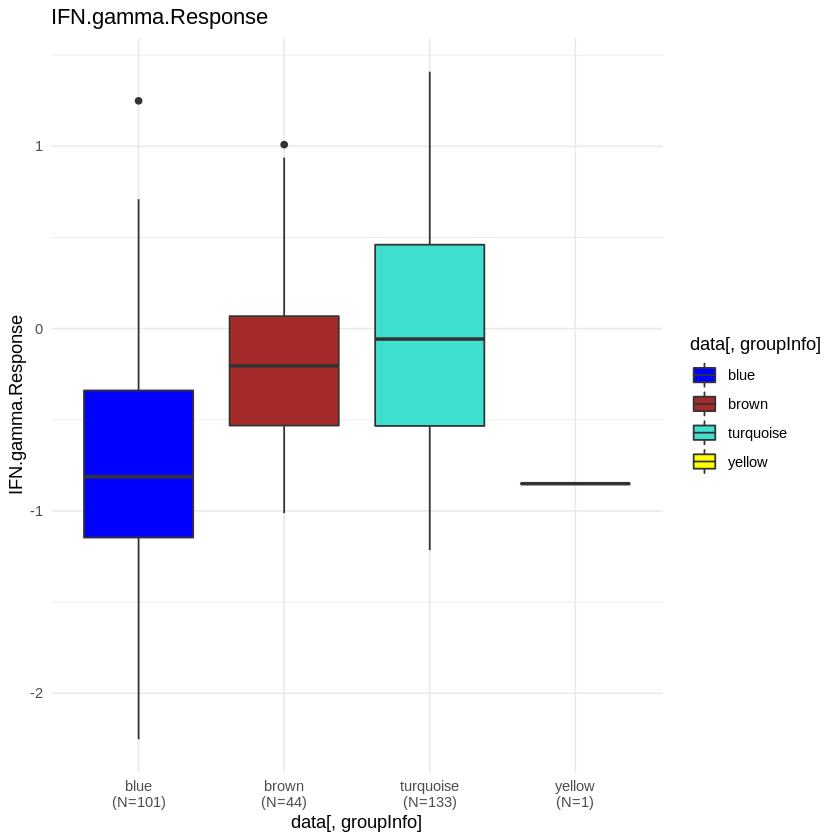

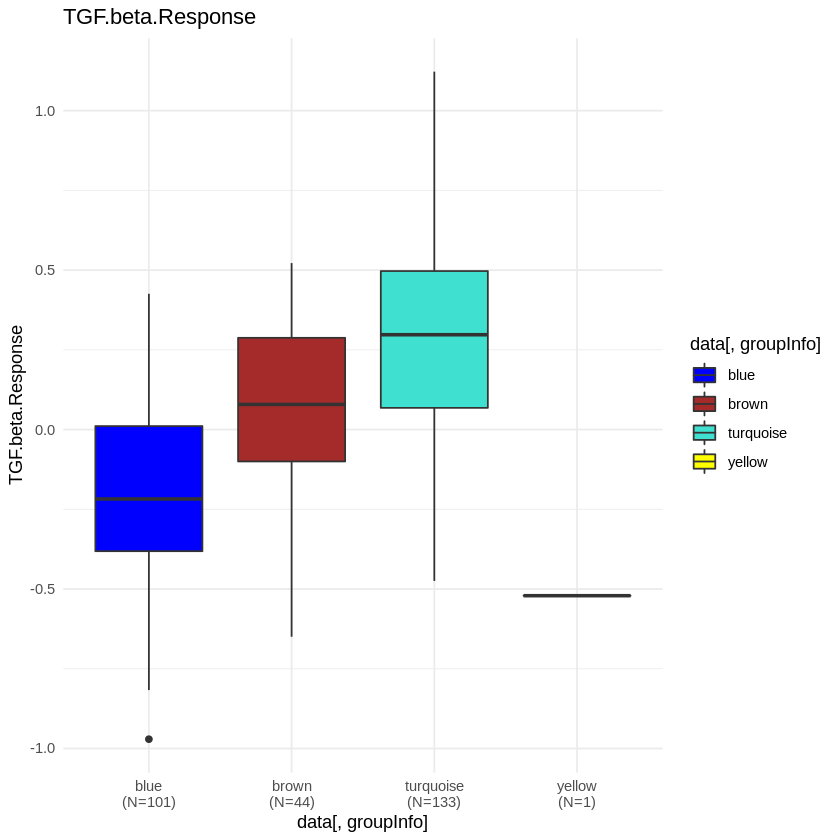

In [6]:
## Wound.Healing ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Wound.Healing",
                   values=c("blue","brown","turquoise","yellow")
)
## Macrophage.Regulation ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Macrophage.Regulation",
                   values=c("blue","brown","turquoise","yellow")
)

## Lymphocyte.Infiltration.Signature.Score ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Lymphocyte.Infiltration.Signature.Score",
                   values=c("blue","brown","turquoise","yellow")
)
## IFN.gamma.Response ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "IFN.gamma.Response",
                   values=c("blue","brown","turquoise","yellow")
)

## TGF.beta.Response ##
#MergeTable.Immune.Char$TGF.beta.Response
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "TGF.beta.Response",
                   values=c("blue","brown","turquoise","yellow")
)

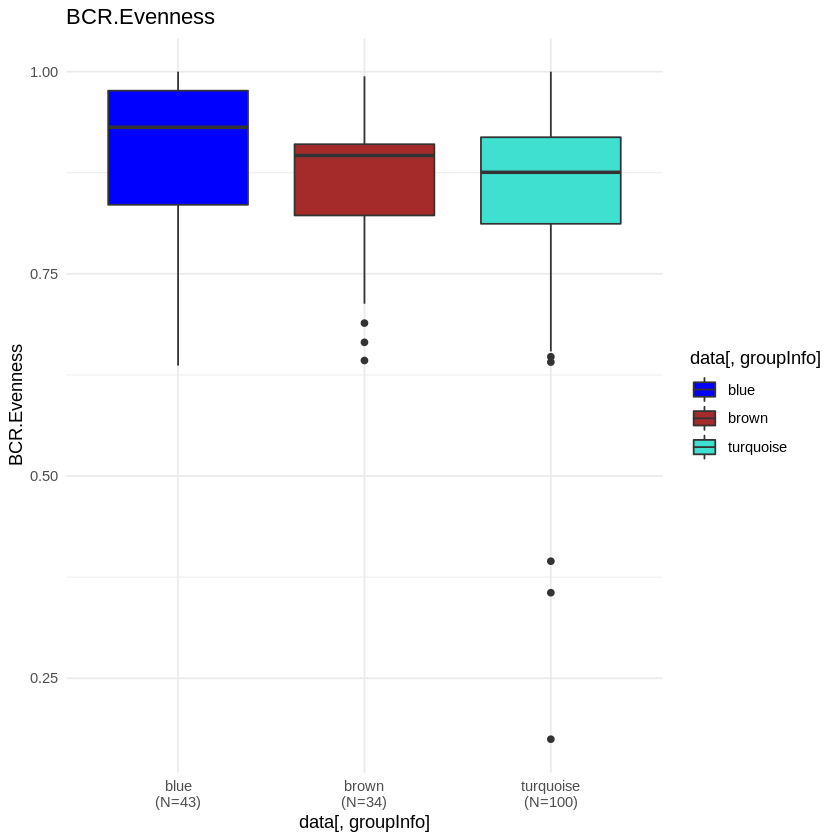

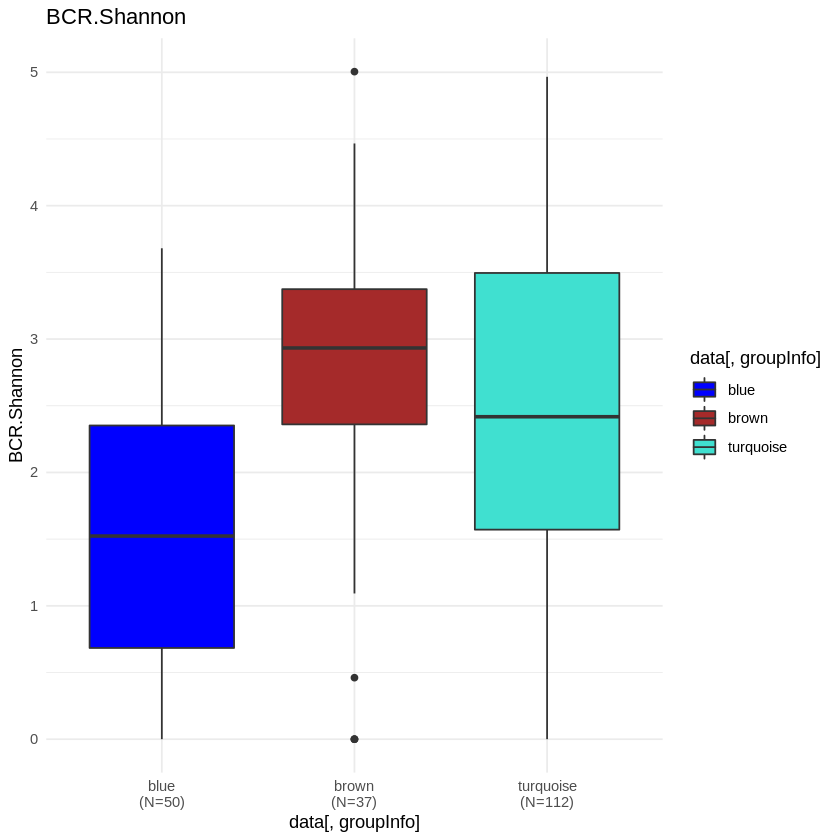

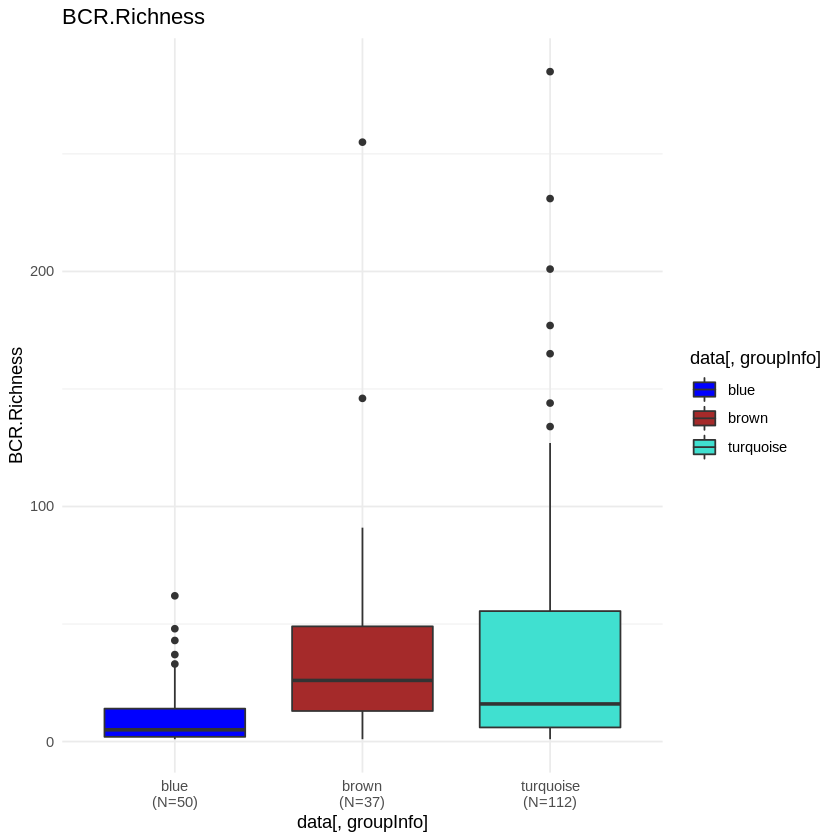

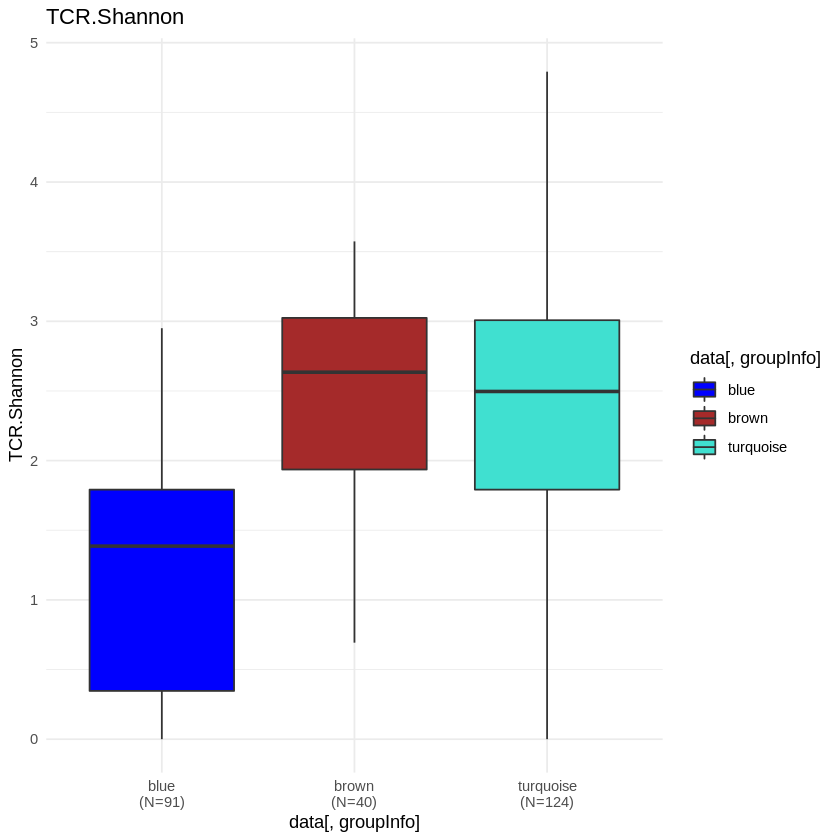

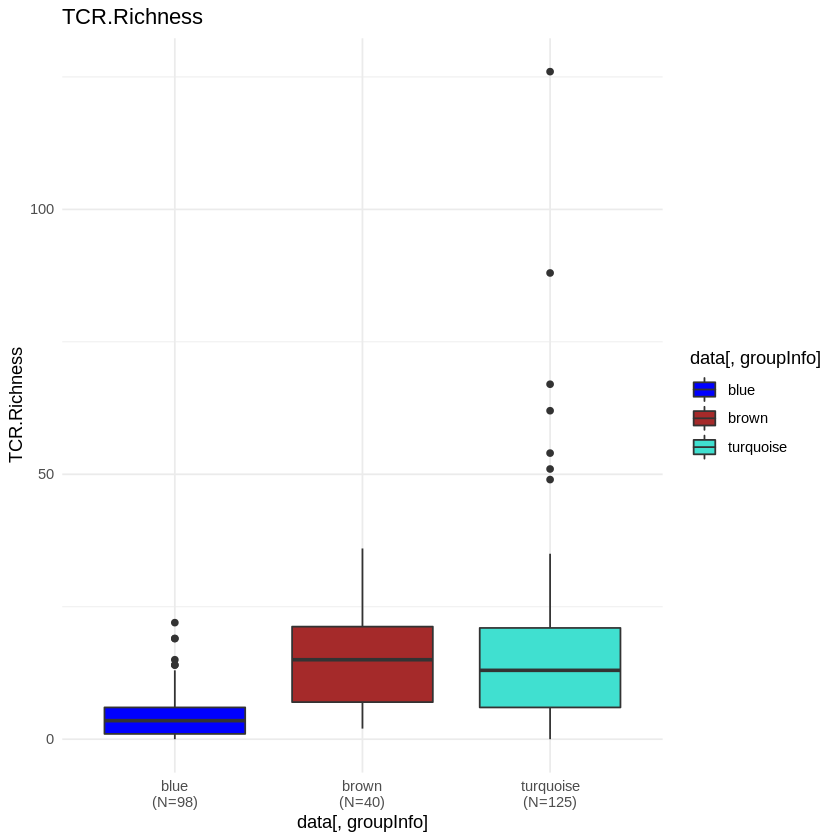

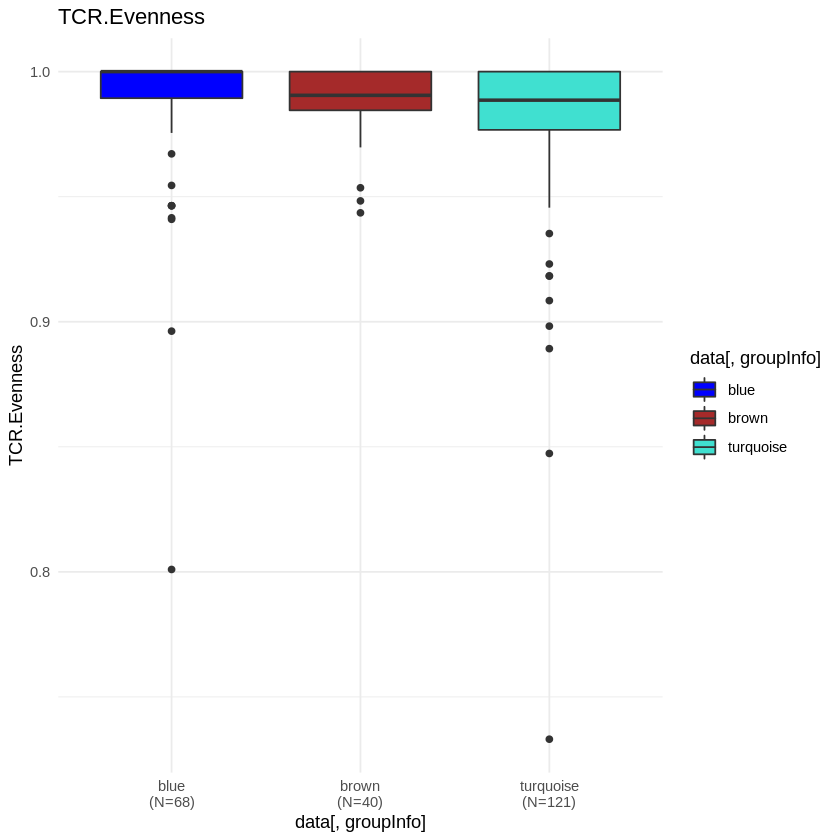

In [9]:
#### T- and B- Cell Receptor Analysis ####
#IgH diversity scores (Shannon Entropy, Evenness, and Richness)
## BCR.Evenness ##
#MergeTable.Immune.Char$BCR.Richness
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "BCR.Evenness",
                   values=c("blue","brown","turquoise","yellow")
)
## BCR.Shannon ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "BCR.Shannon",
                   values=c("blue","brown","turquoise","yellow")
)
## BCR.Richness ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "BCR.Richness",
                   values=c("blue","brown","turquoise","yellow")
)
##  TCR diversity scores (Shannon Entropy, Evenness, and Richness) 
#MergeTable.Immune.Char$TCR.Evenness
## TCR.Shannon ##
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "TCR.Shannon",
                   values=c("blue","brown","turquoise","yellow")
)
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "TCR.Richness",
                   values=c("blue","brown","turquoise","yellow")
)
ggplot2_boxPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "TCR.Evenness",
                   values=c("blue","brown","turquoise","yellow")
)

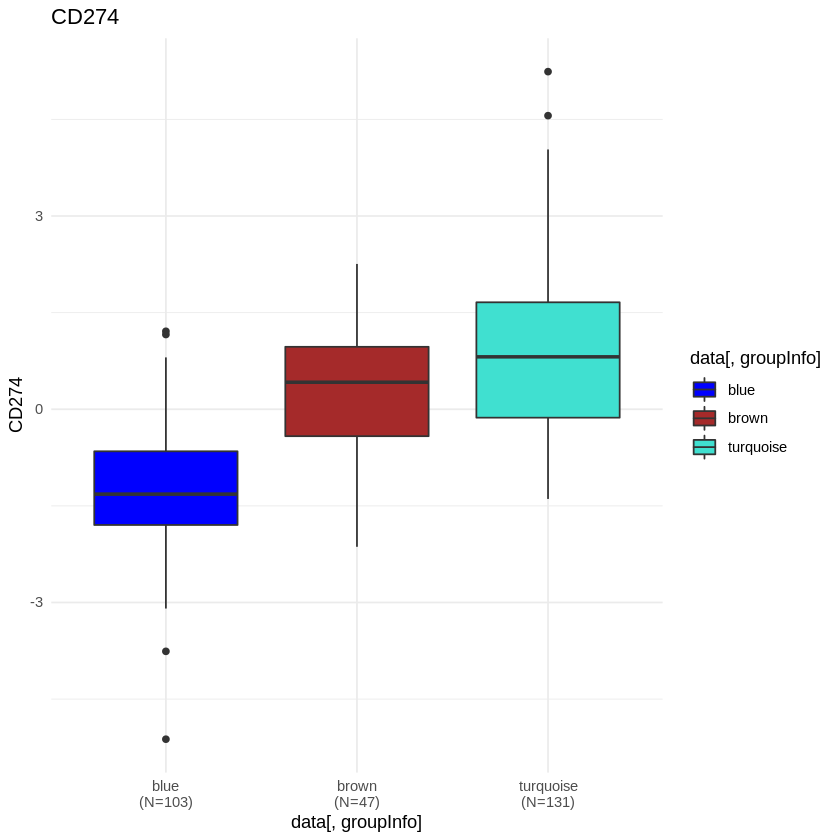

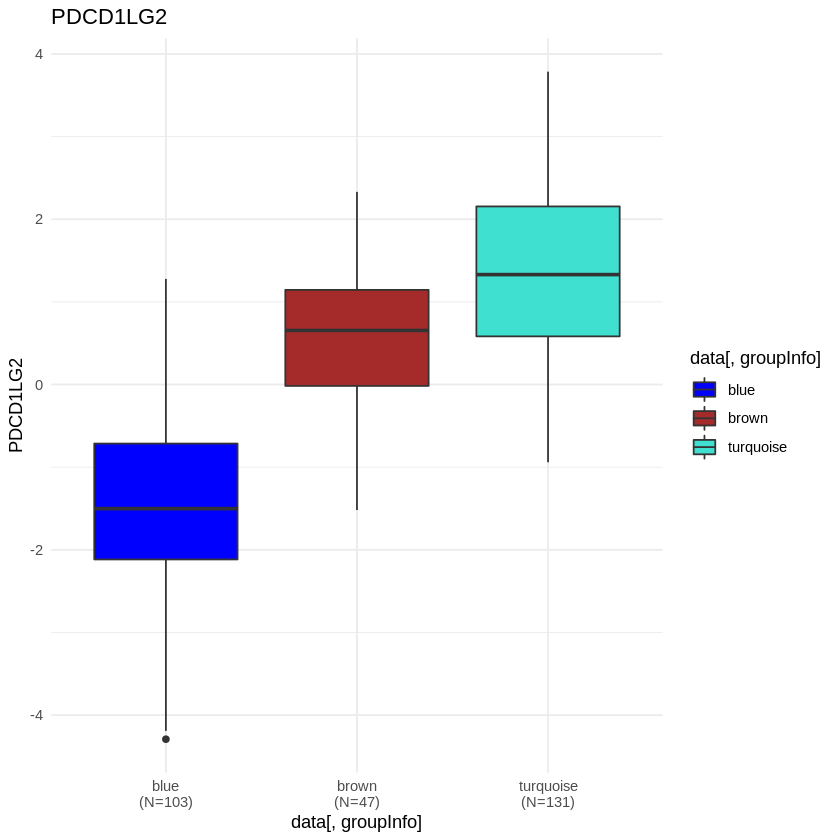

In [10]:
#### PD-1 PDL1 expression #####
# This gene encodes an immune inhibitory receptor ligand
# PDL1 : CD274
# PDL2: PDCD1LG2
## 1)load expression data from Omic datasets
RNAexp_voom_log2 <- readRDS("/data8t_4/JH/MyJobs/COAD_NormalCancer_Project/1_Omic_dataset/2020_3_14_Omic_COAD_RNAexp_voom_log2.rds")
## 2)Merge table
PDL_expr <- as.data.frame(t(RNAexp_voom_log2[c("CD274","PDCD1LG2"),]))
PDL_expr$rownames <- rownames(PDL_expr)
MergeTable.Immune.Gene <- dplyr::left_join(Cluster.df, PDL_expr, by = "rownames")
## 3)Gene plot
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/ggplot2_JH.R")
ggplot2_boxPlot_JH(df = MergeTable.Immune.Gene,groupInfo = "dynamicColors",
                   character = "CD274",
                   values=c("blue","brown","turquoise","yellow")
)
ggplot2_boxPlot_JH(df = MergeTable.Immune.Gene,groupInfo = "dynamicColors",
                   character = "PDCD1LG2",
                   values=c("blue","brown","turquoise","yellow")
)